<a href="https://colab.research.google.com/github/manuelecapece/Unibas-Progetto-Big-data-2022-23/blob/main/QueryManfreda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import os
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Lettura CSV ed importazione in dataframe**

In [ ]:
p01 = open('/content/drive/Shareddrives/Progetto Big Data/DataSet Puliti/presidentielles-2022-1er-tour_cleaned.csv')
pres1 = pd.read_csv(p01, sep = ';')
p02 = open('/content/drive/Shareddrives/Progetto Big Data/DataSet Puliti/presidentielles-2022-2nd-tour_cleaned.csv')
pres2 = pd.read_csv(p02, sep = ';')

<ipython-input-3-01949e1b0243>:2: DtypeWarning: Columns (0,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  pres1 = pd.read_csv(p01, sep = ';')


In [ ]:
#ulteriore filtraggio per 'Français établis hors de France'
condizione = pres1['Libellé du département'] == 'Français établis hors de France'
pres1.drop(pres1[condizione].index, inplace = True)
pres1
condizione2 = pres2['Libellé du département'] == 'Français établis hors de France'
pres2.drop(pres2[condizione2].index, inplace = True)
pres2

In [ ]:
pres1.describe(include = 'all')

In [ ]:
pres1.head(50)

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,N°Panneau,Sexe,Nom,Prénom,Voix,% Voix/Ins,% Voix/Exp,Code Officiel EPCI,Nom Officiel EPCI,Code Officiel Région,Nom Officiel Région,scrutin_code,Latitudine,Longitudine
0,1,Ain,4,4ème circonscription,1001,L'Abergement-Clémenciat,1.0,645,108,16.74,537,83.26,16,2.48,2.98,1,0.16,0.19,520,80.62,96.83,5,F,LE PEN,Marine,149,23.10,28.65,200069193.0,CC de la Dombes,84.0,Auvergne-Rhône-Alpes,PR2022,46.149430,4.924647
1,1,Ain,4,4ème circonscription,1026,Bâgé-le-Châtel,1.0,608,122,20.07,486,79.93,2,0.33,0.41,14,2.30,2.88,470,77.30,96.71,7,M,MÉLENCHON,Jean-Luc,58,9.54,12.34,200071371.0,CC Bresse et Saône,84.0,Auvergne-Rhône-Alpes,PR2022,46.307819,4.928978
2,1,Ain,5,5ème circonscription,1031,Bellignat,1.0,991,249,25.13,742,74.87,13,1.31,1.75,4,0.40,0.54,725,73.16,97.71,4,M,LASSALLE,Jean,27,2.72,3.72,200042935.0,CA Haut - Bugey Agglomération,84.0,Auvergne-Rhône-Alpes,PR2022,46.238150,5.635913
3,1,Ain,5,5ème circonscription,1031,Bellignat,2.0,866,291,33.60,575,66.40,4,0.46,0.70,4,0.46,0.70,567,65.47,98.61,4,M,LASSALLE,Jean,27,3.12,4.76,200042935.0,CA Haut - Bugey Agglomération,84.0,Auvergne-Rhône-Alpes,PR2022,46.238150,5.635913
4,1,Ain,3,3ème circonscription,1033,Valserhône,2.0,1032,353,34.21,679,65.79,15,1.45,2.21,4,0.39,0.59,660,63.95,97.20,2,M,ROUSSEL,Fabien,9,0.87,1.36,240100891.0,CC du Pays Bellegardien (CCPB),84.0,Auvergne-Rhône-Alpes,PR2022,46.128346,5.809133
5,1,Ain,3,3ème circonscription,1033,Valserhône,2.0,1032,353,34.21,679,65.79,15,1.45,2.21,4,0.39,0.59,660,63.95,97.20,4,M,LASSALLE,Jean,26,2.52,3.94,240100891.0,CC du Pays Bellegardien (CCPB),84.0,Auvergne-Rhône-Alpes,PR2022,46.128346,5.809133
6,1,Ain,3,3ème circonscription,1033,Valserhône,2.0,1032,353,34.21,679,65.79,15,1.45,2.21,4,0.39,0.59,660,63.95,97.20,11,M,POUTOU,Philippe,4,0.39,0.61,240100891.0,CC du Pays Bellegardien (CCPB),84.0,Auvergne-Rhône-Alpes,PR2022,46.128346,5.809133
7,1,Ain,3,3ème circonscription,1033,Valserhône,3.0,1233,387,31.39,846,68.61,18,1.46,2.13,3,0.24,0.35,825,66.91,97.52,11,M,POUTOU,Philippe,4,0.32,0.48,240100891.0,CC du Pays Bellegardien (CCPB),84.0,Auvergne-Rhône-Alpes,PR2022,46.114383,5.819466
8,1,Ain,3,3ème circonscription,1033,Valserhône,5.0,239,52,21.76,187,78.24,1,0.42,0.53,0,0.00,0.00,186,77.82,99.47,11,M,POUTOU,Philippe,1,0.42,0.54,240100891.0,CC du Pays Bellegardien (CCPB),84.0,Auvergne-Rhône-Alpes,PR2022,46.098081,5.848820
9,1,Ain,1,1ère circonscription,1024,Attignat,1.0,1207,214,17.73,993,82.27,17,1.41,1.71,4,0.33,0.40,972,80.53,97.89,7,M,MÉLENCHON,Jean-Luc,164,13.59,16.87,200071751.0,CA du Bassin de Bourg-en-Bresse,84.0,Auvergne-Rhône-Alpes,PR2022,46.289731,5.159224


In [ ]:
pres1.info()

In [ ]:
pres1[['Code du département','Code de la commune', 'Code du b.vote']] = pres1[['Code du département','Code de la commune', 'Code du b.vote']].astype("string")
pres1[['Libellé du département','Libellé de la circonscription', 'Libellé de la commune',
    'Sexe','Nom','Prénom','Nom Officiel Région','scrutin_code']] = pres1[['Libellé du département','Libellé de la circonscription', 'Libellé de la commune',
                                                        'Sexe','Nom','Prénom','Nom Officiel Région','scrutin_code']].astype("string")
pres2[['Code du département','Code de la commune', 'Code du b.vote']] = pres2[['Code du département','Code de la commune', 'Code du b.vote']].astype("string")
pres2[['Libellé du département','Libellé de la circonscription', 'Libellé de la commune',
    'Sexe','Nom','Prénom','Nom Officiel Région','scrutin_code']] = pres2[['Libellé du département','Libellé de la circonscription', 'Libellé de la commune',
                                                        'Sexe','Nom','Prénom','Nom Officiel Région','scrutin_code']].astype("string")


In [ ]:
pres2.info()

In [ ]:
pres2.head(50)

**QUERY 1 GIUSTA secondo me** : I 20 dipartimenti con la maggiore percentuale di voti per Macron

In [ ]:
#funzione percentuale voti candidato per dipartimento
def getVoixPercDipa(nome, dataset):
    df_filtered = dataset[dataset['Nom'] == nome]
    df_leg = df_filtered[['Nom', 'Libellé du département','Exprimés','Voix','% Voix/Exp']].sort_values('Libellé du département')
    percentuale_per_dipartimento = df_leg.groupby('Libellé du département')[['Exprimés','Voix']].sum().sort_values(['Libellé du département'])
    df = (percentuale_per_dipartimento['Voix'] / percentuale_per_dipartimento['Exprimés'])*100
    percentuale_per_dipartimento['% Voix/Exp'] = df
    percentuale_per_dipartimento = percentuale_per_dipartimento.rename(columns={'% Voix/Exp': '% Voix/Exp ' + nome})
    df_merged = pd.merge(percentuale_per_dipartimento, dataset, on='Libellé du département')
    return df_merged

In [ ]:
#primo turno
df = getVoixPercDipa('MACRON', pres1)
df_MACRON = df[(df.Nom == 'MACRON')][['Nom', 'Code du département', 'Libellé du département', '% Voix/Exp MACRON']].sort_values(by = ['% Voix/Exp MACRON'], ascending = False)
df_MACRON.drop_duplicates(subset='Libellé du département', inplace=True)
df_MACRON.head(20)

In [ ]:
#secondo turno
df2 = getVoixPercDipa('MACRON', pres2)
df_MACRON2 = df2[(df2.Nom == 'MACRON')][['Nom', 'Code du département', 'Libellé du département', '% Voix/Exp MACRON']].sort_values(by = ['% Voix/Exp MACRON'], ascending = False)
df_MACRON2.drop_duplicates(subset='Libellé du département', inplace=True)
df_MACRON2.head(20)

**QUERY 2 giusta secondo me**: I 20 dipartimenti con la minore percentuale di voti per Macron

In [ ]:
# primo turno
df_2 = getVoixPercDipa('MACRON', pres1)
df_MACRON_2 = df_2[(df_2.Nom == 'MACRON')][['Nom', 'Code du département', 'Libellé du département', '% Voix/Exp MACRON']].sort_values(by = ['% Voix/Exp MACRON'], ascending = True)
df_MACRON_2.drop_duplicates(subset='Libellé du département', inplace=True)
df_MACRON_2.head(20)

In [ ]:
#secondo turno
df2_2 = getVoixPercDipa('MACRON', pres2)
df2_MACRON_2 = df2_2[(df2_2.Nom == 'MACRON')][['Nom', 'Code du département', 'Libellé du département', '% Voix/Exp MACRON']].sort_values(by = ['% Voix/Exp MACRON'], ascending = True)
df2_MACRON_2.drop_duplicates(subset='Libellé du département', inplace=True)
df2_MACRON_2.head(20)

**QUERY 3 giusta secondo me:** I 20 dipartimenti con la maggiore percentuale di voti per Marine LE PEN

In [ ]:
#primo turno
dfLP = getVoixPercDipa('LE PEN', pres1)
dfLP_LEPEN = dfLP[(dfLP.Nom == 'LE PEN')][['Nom', 'Code du département', 'Libellé du département', '% Voix/Exp LE PEN']].sort_values(by = ['% Voix/Exp LE PEN'], ascending = False)
dfLP_LEPEN.drop_duplicates(subset='Libellé du département', inplace=True)
dfLP_LEPEN.head(20)

In [ ]:
#secondo turno
dfLP2 = getVoixPercDipa('LE PEN', pres2)
dfLP_LEPEN2 = dfLP2[(dfLP2.Nom == 'LE PEN')][['Nom', 'Code du département', 'Libellé du département', '% Voix/Exp LE PEN']].sort_values(by = ['% Voix/Exp LE PEN'], ascending = False)
dfLP_LEPEN2.drop_duplicates(subset='Libellé du département', inplace=True)
dfLP_LEPEN2.head(20)

**QUERY 4** : I 20 DIPARTIMENTI CON LA MAGGIORE DISOCCUPAZIONE

In [ ]:
l3 = open('/content/drive/Shareddrives/Progetto Big Data/DataSet Puliti/labouref-france-departement-quarter-jobseeker_cleaned.csv')
lavoro = pd.read_csv(l3, sep = ';')
lavoro.info()


In [ ]:
lavoro[['Trimestre','Catégorie','Tranche d\'âge','Nom Officiel Région','Code Iso 3166-3 Zone','Nom Officiel Département','Code Officiel Département']] = lavoro[['Trimestre','Catégorie','Tranche d\'âge','Nom Officiel Région','Code Iso 3166-3 Zone','Nom Officiel Département','Code Officiel Département']].astype("string")
lavoro['Période'] = lavoro['Période'].astype('int64')
lavoro['Date'] = pd.to_datetime(lavoro['Date'])
lavoro.info()
lavoro

In [ ]:
lavoro_rinominato = lavoro.rename(columns={'Tranche d\'âge': 'Tranche_dage','Nom Officiel Département':'Libellé du département', 'Code Officiel Département':'Code du département'})
lavoro_filtred = lavoro_rinominato[(lavoro_rinominato.Période == 2022)][(lavoro_rinominato.Trimestre == 'T4')][(lavoro_rinominato.Tranche_dage == 'Indifférent')][(lavoro_rinominato.Catégorie == 'ABC')][['Libellé du département', 'Nb moyen demandeur emploi']].sort_values(by = ['Nb moyen demandeur emploi'], ascending = False)
lavoro_filtred.head(20)


In [ ]:
Total = lavoro_filtred['Nb moyen demandeur emploi'].sum()
print(Total)

2629990


 **QUERY 4*** : I 20 DIPARTIMENTI CON IL MAGGIORE TASSO DI DISOCCUPAZIONE

In [ ]:
l4 = open('/content/drive/Shareddrives/Progetto Big Data/DataSet Puliti/TCRD_025.csv')
tasso_dis = pd.read_csv(l4)
tasso_dis[['Libellé du département','Code du département']] = tasso_dis[['Libellé du département','Code du département']].astype("string")
tasso_dis.info()

In [ ]:
df_tassoDis_per_dipartimento = (pd.merge(lavoro_filtred, tasso_dis, on='Libellé du département')).sort_values('% Taux de chômage département T4', ascending=False)
df_tassoDis_per_dipartimento.head(20)

+
+
+
+
+
+
+
+




**CORRELAZIONI**

In [ ]:
#Definizione funzione correlazione percentuale voti candidato per dipartimento primo turno e tasso di vaccinazione
def getCorrVoixVaxPerc(nome, dataset):
    df_filtered = pres1[pres1['Nom'] == nome]
    df_leg = df_filtered[['Nom', 'Libellé du département','Exprimés','Voix','% Voix/Exp']].sort_values('Libellé du département')
    percentuale_per_dipartimento = df_leg.groupby('Libellé du département')[['Exprimés','Voix']].sum().sort_values(['Libellé du département'])
    df = (percentuale_per_dipartimento['Voix'] / percentuale_per_dipartimento['Exprimés'])*100
    percentuale_per_dipartimento['% Voix/Exp'] = df
    percentuale_per_dipartimento = percentuale_per_dipartimento.rename(columns={'% Voix/Exp': '% Voix/Exp ' + nome})
    df_merged = pd.merge(percentuale_per_dipartimento, dataset, on='Libellé du département')
    return df_merged

In [ ]:
def getForzaCorrelazione(valore):
    valoreAbs = abs(valore)
    if 0 <= valoreAbs <= 0.19:
        return "very weak"
    elif 0.2 <= valoreAbs <= 0.39:
        return "weak"
    elif 0.4 <= valoreAbs <= 0.59:
        return "moderate"
    elif 0.6 <= valoreAbs <= 0.79:
        return "strong"
    elif 0.8 <= valoreAbs <= 1:
        return "very strong"

def getSegnoCorrelazione(valore):
    if valore > 0:
        return 'positive'
    return 'negative'

In [ ]:
def getPvalue(colonna1, colonna2):
    pearson_coef, p_value = stats.pearsonr(colonna1, colonna2)
    esito = ''
    if(p_value < 0.001):
        esito = 'There is strong evidence that the correlation is significant'
        return pearson_coef,p_value,esito
    if(p_value < 0.05):
        esito = 'There is moderate evidence that the correlation is significant'
        return pearson_coef,p_value,esito
    if(p_value < 0.1):
        esito = 'There is weak evidence that the correlation is significant'
        return pearson_coef,p_value,esito
    if(p_value > 0.1):
        esito = 'There is no evidence that the correlation is significant'
    return pearson_coef,p_value,esito

def getEsito(colonna1, colonna2):
    pearson_coef,p_value,esito = getPvalue(colonna1, colonna2)
    print('The correlation is :',getForzaCorrelazione(pearson_coef),getSegnoCorrelazione(pearson_coef))
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value,'\n'+esito)

**CORRELAZIONE 1**: Esiste una correlazione, in un dato dipartimento, tra voto a Le Pen nel primo turno e
reddito dichiarato pro capite?

In [ ]:
path_pib ='/content/drive/Shareddrives/Progetto Big Data/DataSet Puliti/PIBPerDipartimento.csv'
df_pib = pd.read_csv(path_pib)
df_pib[['Code du département', 'Libellé du département', 'Nom Officiel Région']] = df_pib[['Code du département', 'Libellé du département', 'Nom Officiel Région']].astype("string")
df_pib.info()

The correlation is : weak negative
The Pearson Correlation Coefficient is -0.33614243486817563  with a P-value of P = 0.017001579442682085 
There is moderate evidence that the correlation is significant


,% Voix/Exp LE PEN,PIB en valeur sont à prix courants
% Voix/Exp LE PEN,1.000000,-0.336142
PIB en valeur sont à prix courants,-0.336142,1.000000


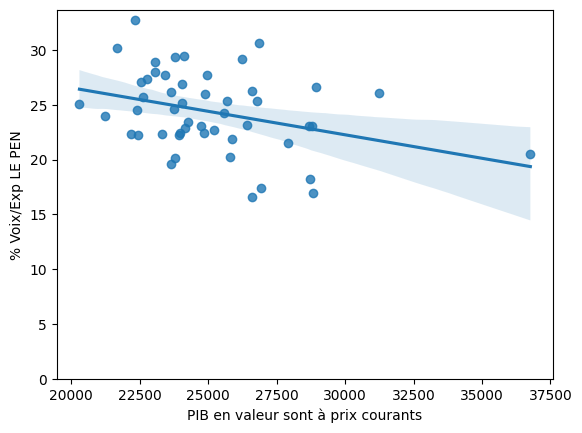

In [ ]:
df_corr_LP_pib = getCorrVoixVaxPerc('LE PEN', df_pib)
df_corr_LP_pib
sns.regplot(y="% Voix/Exp LE PEN", x="PIB en valeur sont à prix courants", data=df_corr_LP_pib)
plt.ylim(0,)
getEsito(df_corr_LP_pib['% Voix/Exp LE PEN'], df_corr_LP_pib['PIB en valeur sont à prix courants'])
df_corr_LP_pib[['% Voix/Exp LE PEN', 'PIB en valeur sont à prix courants']].corr()

**CORRELAZIONE** **2**: Esiste una correlazione, in un dato dipartimento, tra voto a Le Pen nel primo turno e
disoccupazione?

The correlation is : very weak positive
The Pearson Correlation Coefficient is 0.04796920509576456  with a P-value of P = 0.7305075008153219 
There is no evidence that the correlation is significant


,% Voix/Exp LE PEN,% Taux de chômage département T4
% Voix/Exp LE PEN,1.000000,0.047969
% Taux de chômage département T4,0.047969,1.000000


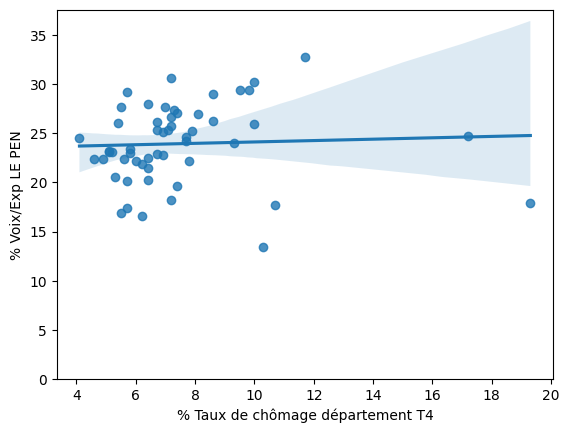

In [ ]:
df_corr_LP_dis = getCorrVoixVaxPerc('LE PEN', df_tassoDis_per_dipartimento)
df_corr_LP_dis
sns.regplot(y="% Voix/Exp LE PEN", x="% Taux de chômage département T4", data=df_corr_LP_dis)
plt.ylim(0,)
getEsito(df_corr_LP_dis['% Voix/Exp LE PEN'], df_corr_LP_dis['% Taux de chômage département T4'])
df_corr_LP_dis[['% Voix/Exp LE PEN', '% Taux de chômage département T4']].corr()

**CORRELAZIONE 3**: Esiste una correlazione, in un dato dipartimento, tra voto a Le Pen nel primo turno e
tasso di vaccinazione?

In [ ]:
l5 = open('/content/drive/Shareddrives/Progetto Big Data/DataSet Puliti/covid-19-france-vaccinations-age-sexe-dep_cleaned.csv')
tasso_vac = pd.read_csv(l5, sep = ';')
tasso_vac[['Nom Officiel Région','Nom Officiel Département','Code Iso 3166-3 Zone', 'Code Officiel Département']] = tasso_vac[['Nom Officiel Région','Nom Officiel Département','Code Iso 3166-3 Zone', 'Code Officiel Département']].astype("string")
tasso_vac['Date'] = pd.to_datetime(tasso_vac['Date'])

In [ ]:
tasso_vac_rinominato = tasso_vac.rename(columns={'Nom Officiel Département':'Libellé du département'})
#corr_new.info()
tasso_vacc_per_dip = (tasso_vac_rinominato[['Libellé du département', 'Couverture vaccinale complète (dose n°2)']]).sort_values('Libellé du département').sort_values(by = ['Couverture vaccinale complète (dose n°2)'], ascending = False)
tasso_vacc_per_dip

The correlation is : very weak positive
The Pearson Correlation Coefficient is 0.07668676350495314  with a P-value of P = 0.5778815029933669 
There is no evidence that the correlation is significant


,% Voix/Exp LE PEN,Couverture vaccinale complète (dose n°2)
% Voix/Exp LE PEN,1.000000,0.076687
Couverture vaccinale complète (dose n°2),0.076687,1.000000


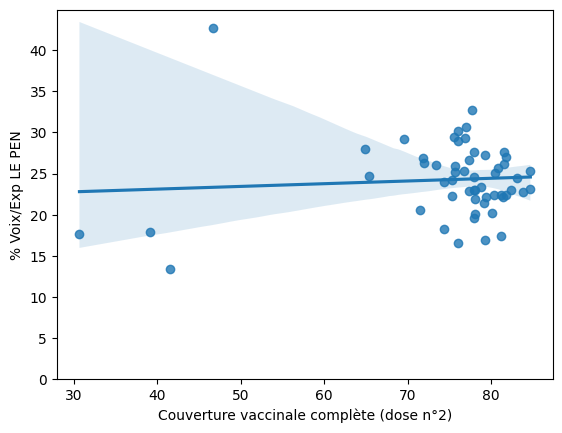

In [ ]:
df_corr_LP_vax = getCorrVoixVaxPerc('LE PEN', tasso_vacc_per_dip)
sns.regplot(y="% Voix/Exp LE PEN", x="Couverture vaccinale complète (dose n°2)", data=df_corr_LP_vax)
plt.ylim(0,)
getEsito(df_corr_LP_vax['% Voix/Exp LE PEN'], df_corr_LP_vax['Couverture vaccinale complète (dose n°2)'])
df_corr_LP_vax[['% Voix/Exp LE PEN', 'Couverture vaccinale complète (dose n°2)']].corr()
#df_LP_vax

**CORRELAZIONE 4**: Esiste una correlazione, in un dato dipartimento, tra voto a Melenchon nel primo
turno e reddito dichiarato pro capite?

The correlation is : very weak positive
The Pearson Correlation Coefficient is 0.00031496623397002767  with a P-value of P = 0.9982679414821967 
There is no evidence that the correlation is significant


,% Voix/Exp MÉLENCHON,PIB en valeur sont à prix courants
% Voix/Exp MÉLENCHON,1.000000,0.000315
PIB en valeur sont à prix courants,0.000315,1.000000


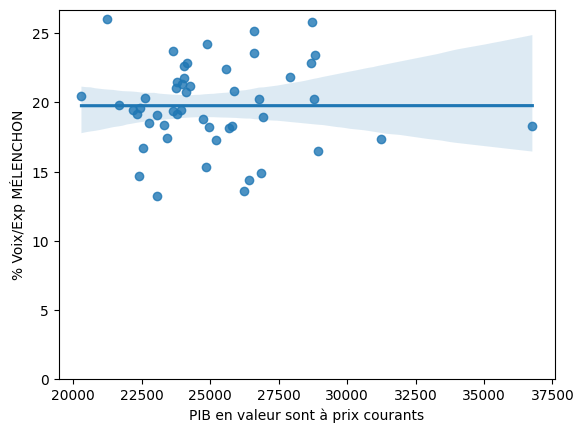

In [ ]:
df_corr_MEL_pib = getCorrVoixVaxPerc('MÉLENCHON', df_pib)
df_corr_MEL_pib
sns.regplot(y="% Voix/Exp MÉLENCHON", x="PIB en valeur sont à prix courants", data=df_corr_MEL_pib)
plt.ylim(0,)
getEsito(df_corr_MEL_pib['% Voix/Exp MÉLENCHON'], df_corr_MEL_pib['PIB en valeur sont à prix courants'])
df_corr_MEL_pib[['% Voix/Exp MÉLENCHON', 'PIB en valeur sont à prix courants']].corr()